In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

In [3]:
sample_a.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


In [4]:
sample_b.head()

,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B


In [5]:
sample_a['date'] = pd.to_datetime(sample_a['date'])
daily_data_a = sample_a.groupby(['date']).agg({'cid':'count', 'transactions':'sum', 'revenue':'sum'})

In [6]:
daily_data_a.head()

,cid,transactions,revenue
date,,,
2020-11-06,2576,16,1577279
2020-11-07,2704,23,1721886
2020-11-08,3354,25,846051
2020-11-09,3234,18,708830
2020-11-10,3022,29,826984


In [7]:
daily_data_a['cum_cid'] = daily_data_a['cid'].cumsum()
daily_data_a['cum_trans'] = daily_data_a['transactions'].cumsum()
daily_data_a['cum_rev'] = daily_data_a['revenue'].cumsum()
daily_data_a.head()

,cid,transactions,revenue,cum_cid,cum_trans,cum_rev
date,,,,,,
2020-11-06,2576,16,1577279,2576,16,1577279
2020-11-07,2704,23,1721886,5280,39,3299165
2020-11-08,3354,25,846051,8634,64,4145216
2020-11-09,3234,18,708830,11868,82,4854046
2020-11-10,3022,29,826984,14890,111,5681030


In [8]:
daily_data_a['conv_trans'] = daily_data_a['cum_trans']/daily_data_a['cum_cid']*100

In [9]:
daily_data_a['mean_rev'] = daily_data_a['cum_rev']/daily_data_a['cum_trans']

In [10]:
daily_data_a.head()

,cid,transactions,revenue,cum_cid,cum_trans,cum_rev,conv_trans,mean_rev
date,,,,,,,,
2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,98579.937500
2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,84593.974359
2020-11-08,3354,25,846051,8634,64,4145216,0.741256,64769.000000
2020-11-09,3234,18,708830,11868,82,4854046,0.690934,59195.682927
2020-11-10,3022,29,826984,14890,111,5681030,0.745467,51180.450450


In [11]:
round(daily_data_a['conv_trans'].mean(), 2)

0.71

In [12]:
sample_b['date'] = pd.to_datetime(sample_b['date'])
daily_data_b = sample_b.groupby(['date']).agg({'cid':'count', 'transactions':'sum', 'revenue':'sum'})
daily_data_b['cum_cid'] = daily_data_b['cid'].cumsum()
daily_data_b['cum_trans'] = daily_data_b['transactions'].cumsum()
daily_data_b['cum_rev'] = daily_data_b['revenue'].cumsum()
daily_data_b['conv_trans'] = daily_data_b['cum_trans']/daily_data_b['cum_cid']*100
daily_data_b['mean_rev'] = daily_data_b['cum_rev']/daily_data_b['cum_trans']
daily_data_b.head()

,cid,transactions,revenue,cum_cid,cum_trans,cum_rev,conv_trans,mean_rev
date,,,,,,,,
2020-11-06,2499,19,996645,2499,19,996645,0.760304,52455.000000
2020-11-07,2804,19,555499,5303,38,1552144,0.716576,40845.894737
2020-11-08,3291,24,3044842,8594,62,4596986,0.721434,74144.935484
2020-11-09,3062,25,1285836,11656,87,5882822,0.746397,67618.643678
2020-11-10,3072,30,2414726,14728,117,8297548,0.794405,70919.213675


In [13]:
round(daily_data_b['conv_trans'].mean(), 2)

0.76

<Axes: xlabel='date', ylabel='conv_trans'>

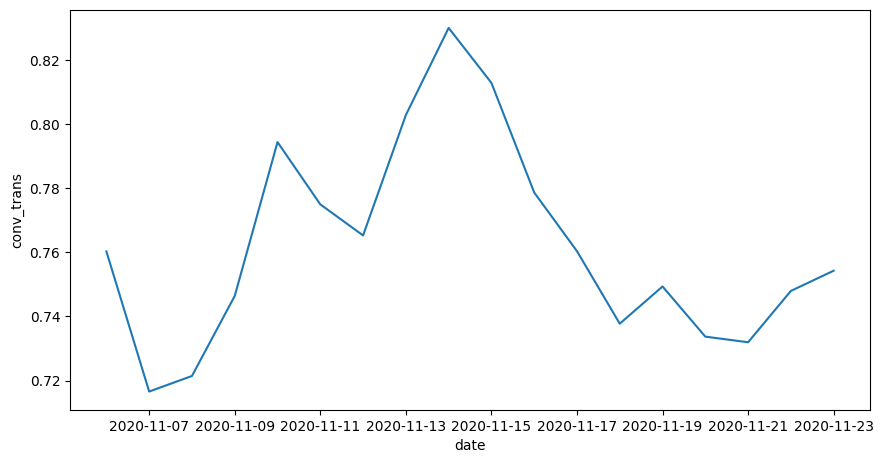

In [14]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([1,1,1,1])
sns.lineplot(data=daily_data_b,x='date', y='conv_trans', ax=ax)

<Axes: xlabel='date', ylabel='conv_trans'>

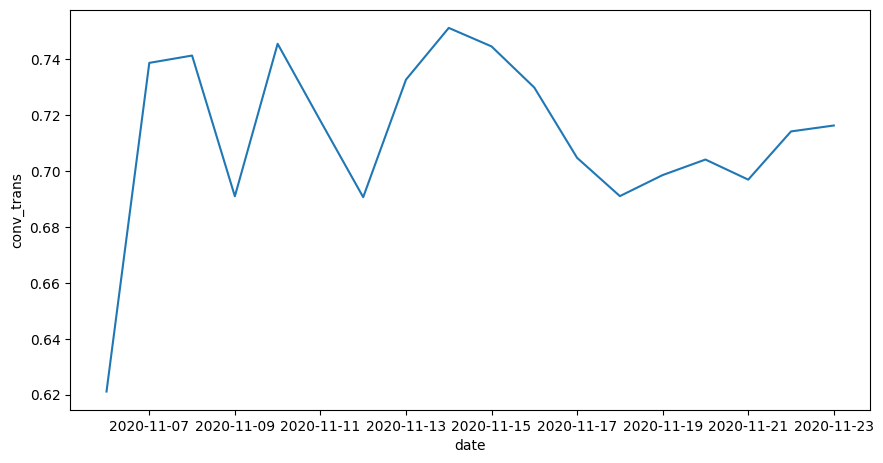

In [15]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([1,1,1,1])
sns.lineplot(data=daily_data_a,x='date', y='conv_trans', ax=ax)

<Axes: xlabel='date', ylabel='mean_rev'>

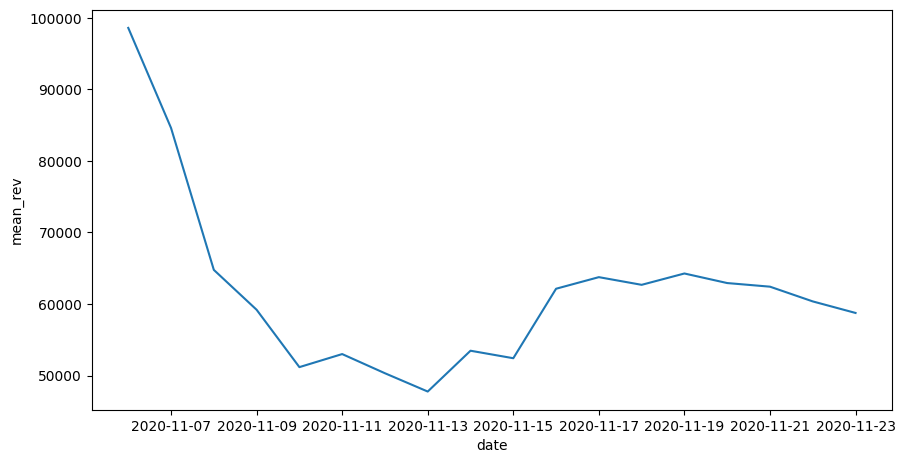

In [16]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([1,1,1,1])
sns.lineplot(data=daily_data_a,x='date', y='mean_rev', ax=ax)

<Axes: xlabel='date', ylabel='mean_rev'>

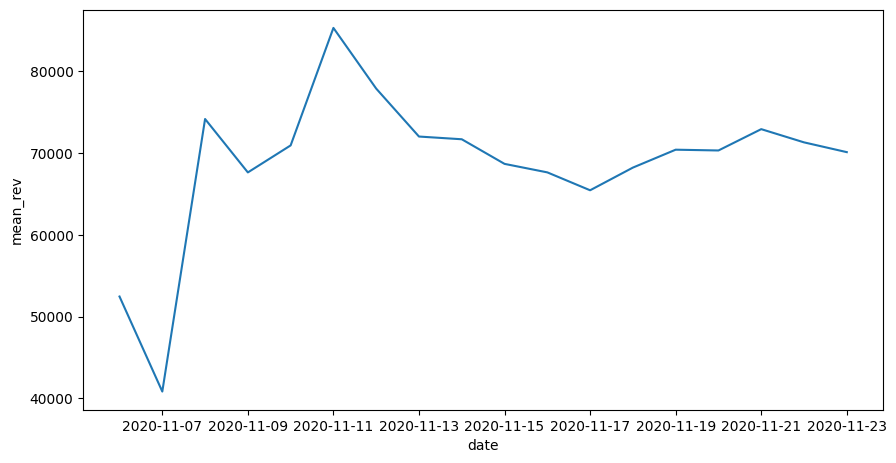

In [17]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([1,1,1,1])
sns.lineplot(data=daily_data_b,x='date', y='mean_rev', ax=ax)

In [19]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          61571 non-null  datetime64[ns]
 1   cid           61571 non-null  float64       
 2   transactions  61571 non-null  int64         
 3   revenue       61571 non-null  int64         
 4   group         61571 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.3+ MB


In [24]:
data = pd.concat([sample_a, sample_b], join='outer', ignore_index=True)
data

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A
...,...,...,...,...,...
122949,2020-11-23,9.965675e+08,0,0,B
122950,2020-11-23,9.970803e+07,0,0,B
122951,2020-11-23,9.984814e+08,0,0,B
122952,2020-11-23,9.991118e+08,0,0,B


In [25]:
data_piv = data.groupby('group')['transactions'].agg(['sum','count'])
data_piv

,sum,count
group,,
A,441,61571
B,463,61383


In [26]:
H0 = 'Конверсии групп А и В равны'
H1 = 'Конверсия в группе А меньше'
from statsmodels.stats.proportion import proportions_ztest
alpha = 0.1
_,p_value = proportions_ztest(count=data_piv['sum'], nobs=data_piv['count'], alternative='smaller')
print('p-value:', round(p_value, 2))
if p_value<alpha:
    print('Отвергаем нулевую гипотезу. {}'.format(H1))
else:
    print('Принимаем нулевую гипотезу: {}'.format(H0))


p-value: 0.22
Принимаем нулевую гипотезу: Конверсии групп А и В равны


In [28]:
from scipy.stats import shapiro
H0 = 'Распределение нормальное'
H1 = 'Распределение отлично от нормального'
alpha = 0.1
shapiro_a = shapiro(daily_data_a['mean_rev'])
shapiro_b = shapiro(daily_data_b['mean_rev'])
print('p-value группы А:', round(shapiro_a.pvalue, 2))
print('p-value группы В:', round(shapiro_b.pvalue, 2))
if shapiro_a.pvalue<alpha or shapiro_b.pvalue<alpha:
    print('Отвергаем нулевую гипотезу. {}'.format(H1))
else:
    print('Принимаем нулевую гипотезу: {}'.format(H0))
    

p-value группы А: 0.0
p-value группы В: 0.0
Отвергаем нулевую гипотезу. Распределение отлично от нормального


In [29]:
H0 = 'Ежедневные средние чеки групп А и В равны'
H1 = 'Ежедневный чек в группе А меньше'
alpha = 0.1
from scipy.stats import mannwhitneyu
mann = mannwhitneyu(x=daily_data_a['mean_rev'], y=daily_data_b['mean_rev'], alternative='less')
print('p-value:', mann.pvalue)

p-value: 0.0009153623248471154
